In [1]:
import numpy as np
from numpy import *
import scipy.io
from scipy import special
import matplotlib
import matplotlib.pyplot as plt
import struct


from mpl_toolkits.mplot3d import Axes3D
from matplotlib import cm
from matplotlib.ticker import LinearLocator, FormatStrFormatter


%matplotlib inline  

In [2]:
#file = open('/fastdata/cs1mkg/smaug/spic5b2_2_tube1/zerospic1__761000.out','rb')
file = open('/fastdata/cs1mkg/smaug/spic_5b2_2_bv50G/zerospic1__177000.out','rb')
#file = open('/fastdata/cs1mkg/smaug/spic_5b2_2_bv20G/zerospic1__469000.out','rb')




In [3]:

R=8.3e+003
mu=1.257E-6
mu_gas=0.6
gamma=1.66667



In [4]:
#;****************** Pressure background begin ********************
#TP=saeb
#TP=TP-(sabx_t^2.0+saby_t^2.0+sabz_t^2.0)/2.0
#TP=(gamma-1.d0)*TP
#;****************** Pressure background end ********************
#T=mu_gas*TP/R/sarho_t

In [5]:
file.seek(0,2)
eof = file.tell()
file.seek(0,0)

name = file.read(79)

nit = fromfile(file,dtype=int32,count=1)

t = fromfile(file,dtype=float64,count=1)
ndim=fromfile(file,dtype=int32,count=1)
neqpar=fromfile(file,dtype=int32,count=1)
nw=fromfile(file,dtype=int32,count=1)

ndata = fromfile(file,dtype=int32,count=ndim)[:ndim]

varbuf = fromfile(file,dtype=float,count=7)[:7]

#if ndim=2
varnames = file.read(79)

#if ndim=3
 
 
 
 
 
 #typedef enum vars {rho, mom1, mom2, mom3, energy, b1, b2, b3,energyb,rhob,b1b,b2b,b3b} CEV;

if ndim==3:
    alldat=fromfile(file,dtype=float,count=(nw+ndim)*ndata[0]*ndata[1]*ndata[2])[:(nw+ndim)*ndata[0]*ndata[1]*ndata[2]]
    #if size(alldat)<(nw+ndim)*ndata[0]*ndata[1]*ndata[2]:
    #    alldat=resize(alldat,(nw+ndim)*ndata[0]*ndata[1]*ndata[2])
    alldat=np.reshape(alldat,(nw+ndim,ndata[0],ndata[1],ndata[2],),'C')  # should be 'C' 'F' or 'A' order

file.close()


/usr/local/packages/apps/conda/envs/anaconda2-4.2.0/lib/python2.7/site-packages/ipykernel/__main__.py:14: VisibleDeprecationWarning: converting an array with ndim > 0 to an index will result in an error in the future
/usr/local/packages/apps/conda/envs/anaconda2-4.2.0/lib/python2.7/site-packages/ipykernel/__main__.py:30: VisibleDeprecationWarning: converting an array with ndim > 0 to an index will result in an error in the future
/usr/local/packages/apps/conda/envs/anaconda2-4.2.0/lib/python2.7/site-packages/numpy/core/fromnumeric.py:225: VisibleDeprecationWarning: converting an array with ndim > 0 to an index will result in an error in the future
  return reshape(newshape, order=order)


In [6]:
print 'varnames:',varnames
print 'nit:',nit
print 'name:',name
print 't:',t
print 'ndim:',ndim
print 'neqpar:',neqpar
print 'nw:',nw
print 'varbuf:',varbuf

varnames: x y z rho mx my mz e bx by bz gamma eta g1 g2 g3                               
nit: [177000]
name: test1                                                                          
t: [ 177.001]
ndim: [3]
neqpar: [7]
nw: [13]
varbuf: [   1.66666667    0.         -274.            0.            0.            0.
    0.        ]


In [7]:
print size(alldat)
print shape(alldat)

33554432
(16, 128, 128, 128)


In [31]:
x=alldat[0,:,:,:]
y=alldat[1,:,:,:]
z=alldat[2,:,:,:]

#Bx=alldat[13,:,:,:]+alldat[5,:,:,:]
#By=alldat[14,:,:,:]+alldat[6,:,:,:]
#Bz=alldat[15,:,:,:]+alldat[7,:,:,:]

#Bx=alldat[8,:,:,:]*sqrt(mu)*1.0e4
#By=alldat[9,:,:,:]*sqrt(mu)*1.0e4
#Bz=alldat[10,:,:,:]*sqrt(mu)*1.0e4




dens=alldat[0,:,:,:]

X=alldat[0,64,:,:]/1.0e6
Y=alldat[1,64,:,:]/1.0e6
vx=alldat[4,64,:,:]/(alldat[3,64,:,:]+alldat[12,64,:,:])
vy=100000*alldat[5,64,:,:]/(alldat[3,64,:,:]+alldat[12,64,:,:])
vz=100000*alldat[6,64,:,:]/(alldat[3,64,:,:]+alldat[12,64,:,:])
rho=(alldat[3,64,:,:])*1.0e12
e=alldat[7,64,:,:]
#vx=alldat[4,64,:,:]
#dens=(alldat[3,64,:,:]+alldat[12,64,:,:])
bx=alldat[8,64,:,:]*sqrt(mu)*1.0e4
by=alldat[9,64,:,:]*sqrt(mu)*1.0e4
bz=alldat[10,64,:,:]*sqrt(mu)*1.0e4



Using subplot
https://matplotlib.org/2.0.2/api/pyplot_api.html#matplotlib.pyplot.subplot

A working example!
https://matplotlib.org/examples/mplot3d/mixed_subplots_demo.html

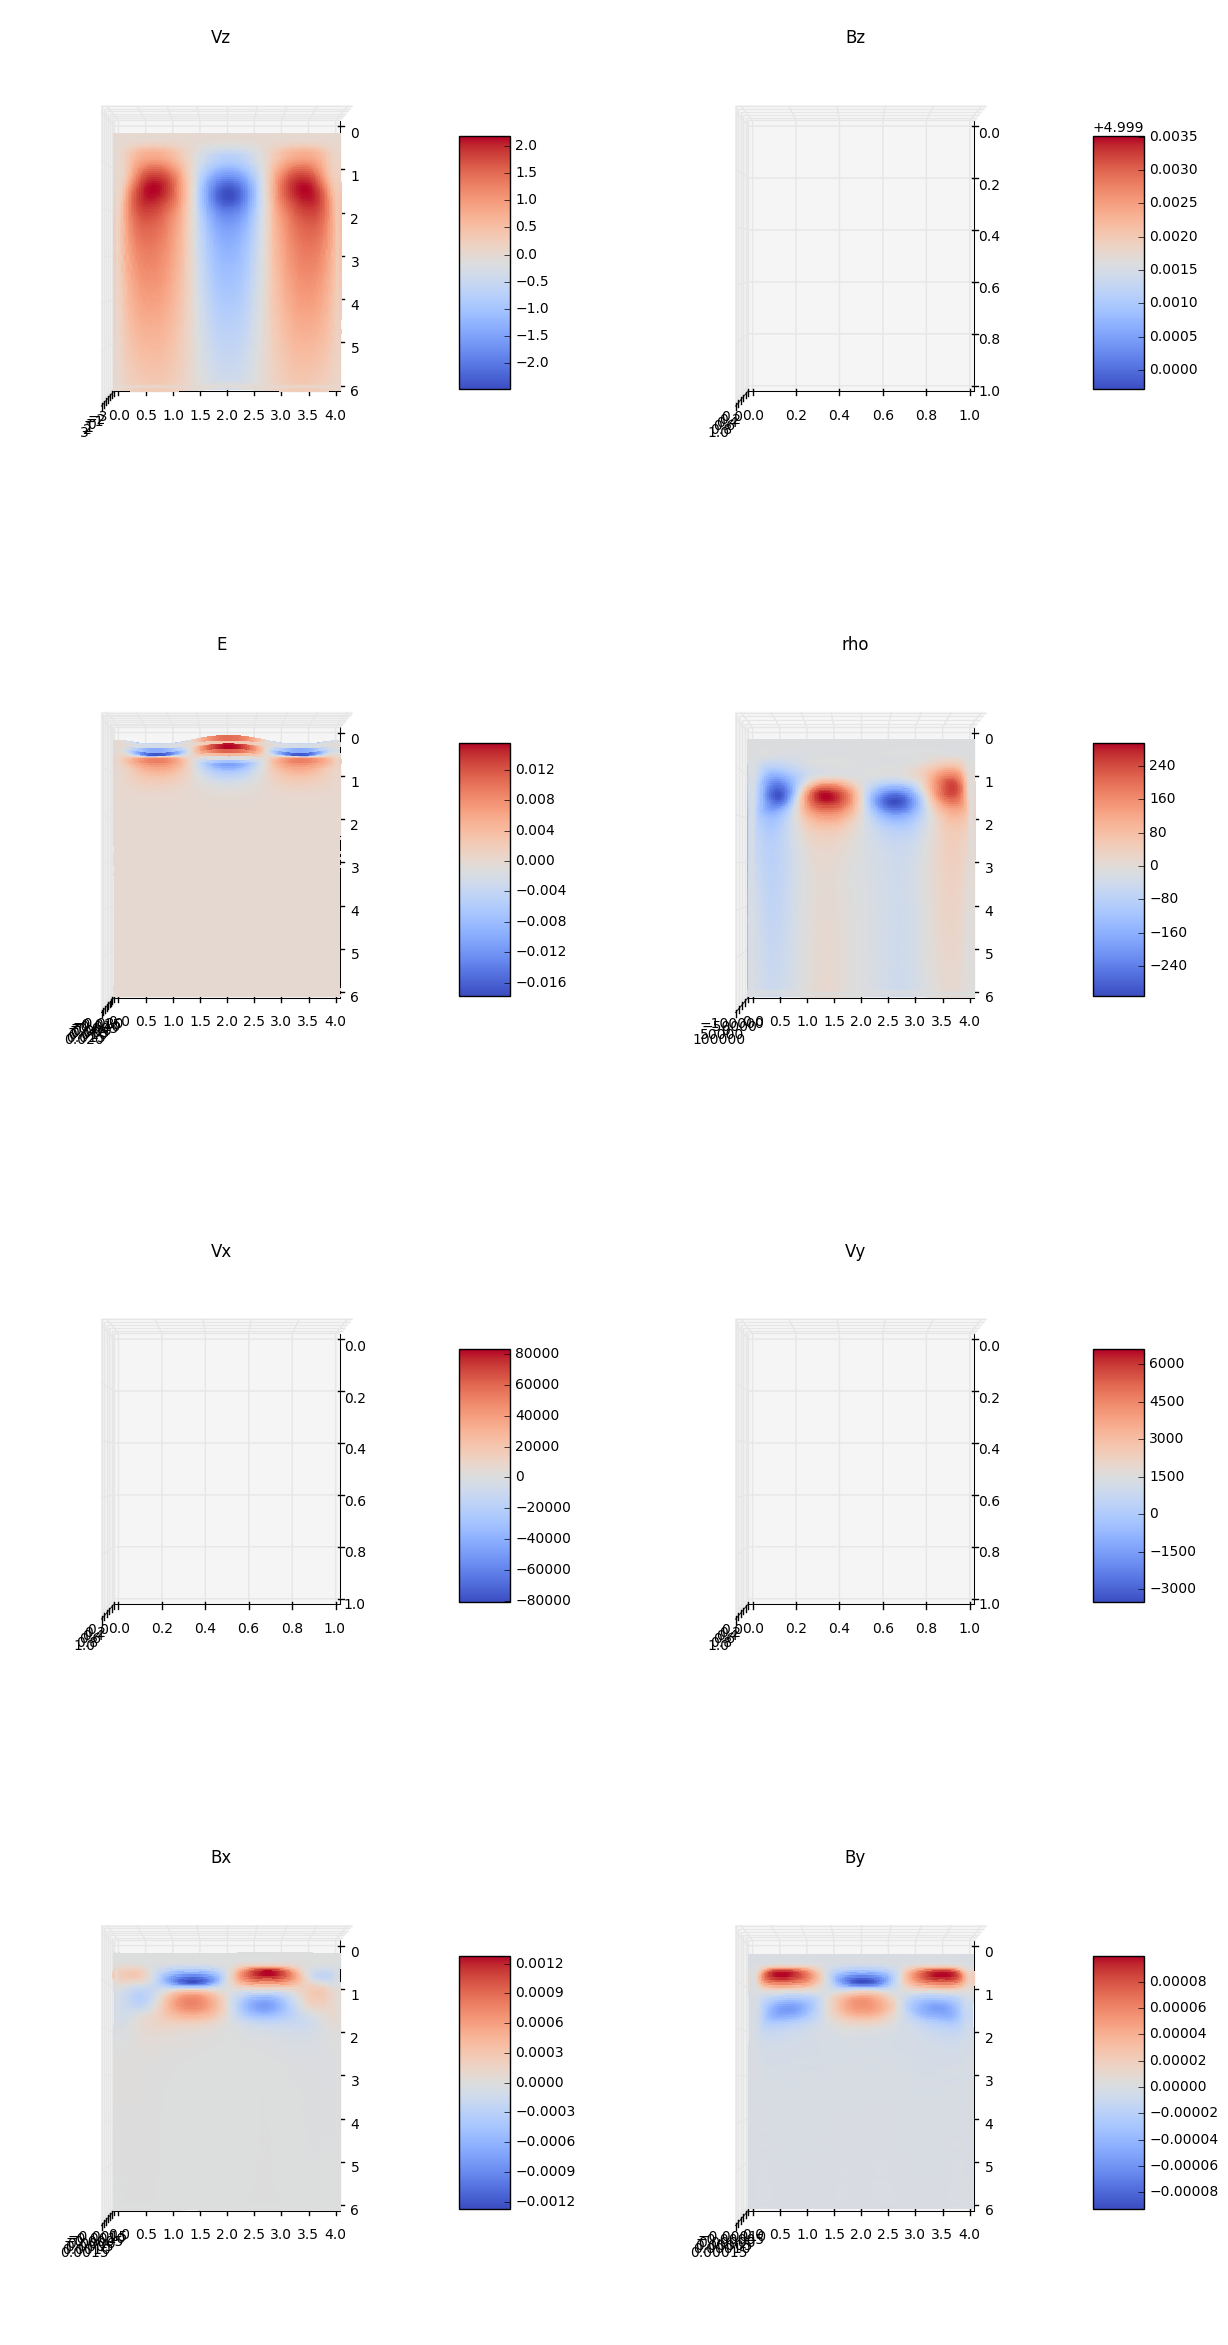

In [32]:
fig = plt.figure(figsize=(15,30))

ax = fig.add_subplot(4, 2, 1, projection='3d', title='Vz')


surf = ax.plot_surface(X, Y, vx, rstride=1, cstride=1, cmap=cm.coolwarm,
                       linewidth=0, antialiased=False)

ax.view_init(elev=90,azim=0) 
fig.colorbar(surf, shrink=0.5, aspect=5)



abz = fig.add_subplot(4, 2, 2, projection='3d', title='Bz')


surfbz = abx.plot_surface(X, Y, bx, rstride=1, cstride=1, cmap=cm.coolwarm,
                       linewidth=0, antialiased=False)

abz.view_init(elev=90,azim=0) 
fig.colorbar(surfbz, shrink=0.5, aspect=5)



ae = fig.add_subplot(4, 2, 3, projection='3d', title='E')


surfe = ae.plot_surface(X, Y, e, rstride=1, cstride=1, cmap=cm.coolwarm,
                       linewidth=0, antialiased=False)

ae.view_init(elev=90,azim=0) 
fig.colorbar(surfe, shrink=0.5, aspect=5)





arho = fig.add_subplot(4, 2, 4, projection='3d', title='rho')


surfrho = arho.plot_surface(X, Y, rho, rstride=1, cstride=1, cmap=cm.coolwarm,
                       linewidth=0, antialiased=False)

arho.view_init(elev=90,azim=0) 
fig.colorbar(surfrho, shrink=0.5, aspect=5)




avx = fig.add_subplot(4, 2, 5, projection='3d', title='Vx')


surfvx = arho.plot_surface(X, Y, vy, rstride=1, cstride=1, cmap=cm.coolwarm,
                       linewidth=0, antialiased=False)

avx.view_init(elev=90,azim=0) 
fig.colorbar(surfvx, shrink=0.5, aspect=5)


avy = fig.add_subplot(4, 2, 6, projection='3d', title='Vy')


surfvy = arho.plot_surface(X, Y, vz, rstride=1, cstride=1, cmap=cm.coolwarm,
                       linewidth=0, antialiased=False)

avy.view_init(elev=90,azim=0) 
fig.colorbar(surfvy, shrink=0.5, aspect=5)




abx = fig.add_subplot(4, 2, 7, projection='3d', title='Bx')


surfbx = abx.plot_surface(X, Y, by, rstride=1, cstride=1, cmap=cm.coolwarm,
                       linewidth=0, antialiased=False)

abx.view_init(elev=90,azim=0) 
fig.colorbar(surfbx, shrink=0.5, aspect=5)




aby = fig.add_subplot(4, 2, 8, projection='3d', title='By')


surfby = aby.plot_surface(X, Y, bz, rstride=1, cstride=1, cmap=cm.coolwarm,
                       linewidth=0, antialiased=False)

aby.view_init(elev=90,azim=0) 
fig.colorbar(surfby, shrink=0.5, aspect=5)









plt.show()